<a href="https://colab.research.google.com/github/coolwyxiao/Fashion_MNIST/blob/main/Fashion_MNIST_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Show Fashion MNIST

5
5
7
7
2
7
2
2
2
5


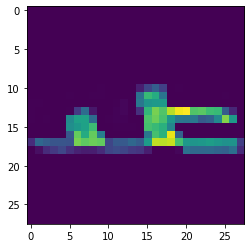

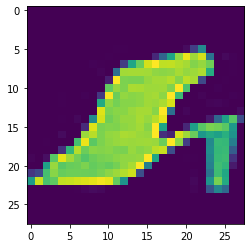

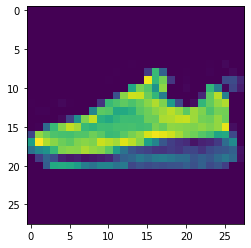

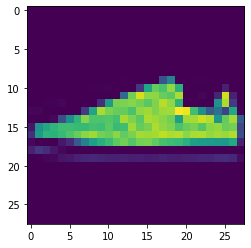

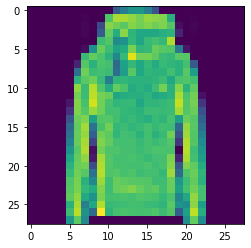

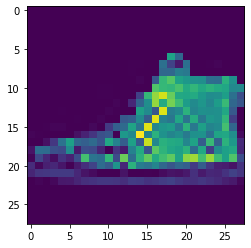

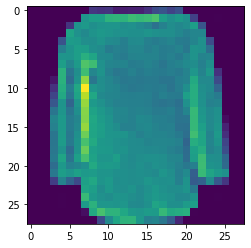

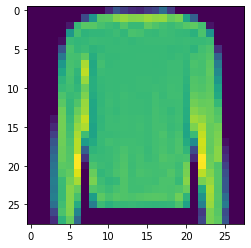

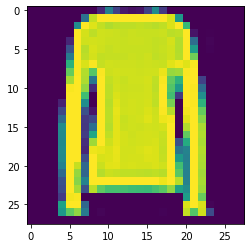

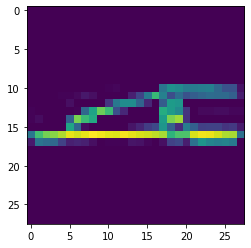

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import random

train = np.load("train.npy") #(60000,28,28)
train = np.array(train)
train_label = np.load("train_labels.npy")
train_label = list(train_label)

test = np.load("test.npy") #(10000,28,28)
test = np.array(test)
test_label = np.load("test_labels.npy")
test_label = list(test_label)

def get_index(label):
  '''
  input: label array from train_labels.npy
  return: list of indexes which meet requirements of problem
  '''
  index_1 = [] # extract indexes with {2,5}
  index_2 = [] # extract indexes with {2,5,7}
  value_1 = []
  value_2 = []
  value_binary = []
  cnn_binary = []
  j = 0
  for i in label:
      if i == 2 or i == 5 or i==7:
        index_2.append(j)
        value_2.append(i)
        if i == 2:
          cnn_binary.append(0)
        if i == 5:
          cnn_binary.append(1)
        else:
          cnn_binary.append(2)
      if i == 2 or i == 5:
        index_1.append(j)
        value_1.append(i)
        if i == 2:
          value_binary.append(-1)
        else:
          value_binary.append(1)
      j += 1
  return(index_1,index_2,value_1,value_2,value_binary,cnn_binary)

index = get_index(train_label)
index_1 = index[0] # list of indexes with data associated with {2,5}
index_2 = index[1] # list of indexes with data associated with {2,5,7}
value_1 = index[2] # list of data labels associated with {2,5}
value_2 = index[3] # list of data labels associated with {2,5,7}
value_binary_1 = np.array(index[4]) # array of data associated with {2,5}, convert value to -1 and 1
cnn_binary_1 = np.array(index[5]) # array of data associated with {2,5,7}, convert value to 0,1,2
data_1 = train[np.array(index_1)] # array of data be selected with {2,5}(12000 items)
data_2 = train[np.array(index_2)] # array of data be selected with {2,5,7}(18000 items)

index_test = get_index(test_label)
index_3 = index_test[0] # list of indexes with data associated with {2,5}
index_4 = index_test[1] # list of indexes with data associated with {2,5,7}
value_3 = index_test[2] # list of data labels associated with {2,5}
value_4 = index_test[3] # list of data labels associated with {2,5,7}
value_binary_2 = np.array(index_test[4]) # array of data associated with {2,5}, convert value to -1 and 1
cnn_binary_2 = np.array(index_test[5]) # array of data associated with {2,5,7}, convert value to 0,1,2
data_3 = test[np.array(index_3)] # array of data be selected with {2,5} (2000 items)
data_4 = test[np.array(index_4)] # array of data be selected with {2,5,7} (3000 items)

#plt.spy(train[0],markersize = 4)

def random_image(index, data):
  '''
  input: list of indexes we need to use, data array we select
  '''
  length = len(data)
  for x in range(10):
      plt.figure(x)
      ran =  random.randint(0,length)
      val = index[ran]
      value = train_label[val]
      plt.imshow(data[ran])
      print(value)

random_image(index_2,data_2) # answer of question 1

##1. Pegasos method

In [ ]:
def convert_matrix(x):
    '''convert matrix to 1D vector'''
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])      # for the training set
    x = np.reshape(x, (num_data, pixel_length * pixel_length, 1))       # reshape to (12000, 28*28, 1)(for Training Set)
    return x
    
def pegasos(x, y, m, n, weights=None, iterations=2000, lam=1, b=32): # lam=100, b=10
    '''
    input: x=data_1(array), y=value_binary_1(array), b is mini-batch size, m and n are test data(data_3) and test labels(value_binary_1(array))
    '''
    x = convert_matrix(x)
    m = convert_matrix(m)
    error_list_1 = []
    error_list_2 = []
    if type(weights) == type(None): weights = np.zeros((len(x[0]),1)) 
    num_S = len(y)
    for i in range(iterations):
      step = 1/(lam*(i+1))
      gradient = np.zeros((len(x[0]),1))
      j = 0
      while j < b:
        it = random.randint(0, num_S-1)
        decision = y[it] * np.dot(weights.T, x[it])[0, 0]
        if decision < 1:
           gradient += y[it] * x[it]
        j += 1
      value_1 = lam * weights - gradient/b 
      weights_1 = weights - step * value_1
      weights = min(1, lam**(-0.5)/np.linalg.norm(weights_1)) * weights_1 
      error_list_1.append(get_errors(x, y, weights))
      error_list_2.append(get_errors(m, n, weights))
      if i % 100 == 0:
        print(i/iterations)
    return error_list_1, error_list_2


def get_errors(x, y, weights):
    '''
    input: x=data_1(array), y=value_binary_1(array), weights is a matrix with row x and column y
    '''
    a = 0
    i = 0
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])
    for i in range(num_data):
      if (np.dot(weights.T, x[i])[0, 0] < 0):
        print(np.dot(weights.T, x[i])[0, 0])
      decision = y[i] * (np.dot(weights.T, x[i])[0, 0])
      if decision < 1:
        a += 1
    error = a/len(x)
    return error

error_list_train, error_list_test = (pegasos(data_1,value_binary_1, data_3, value_binary_2))
print(error_list_train)
print(error_list_test)

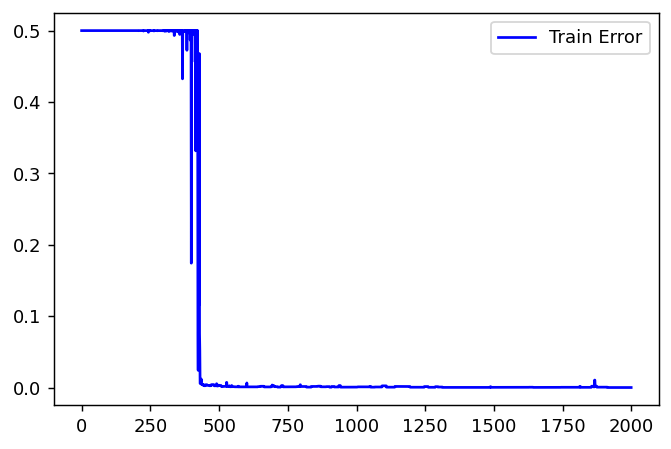

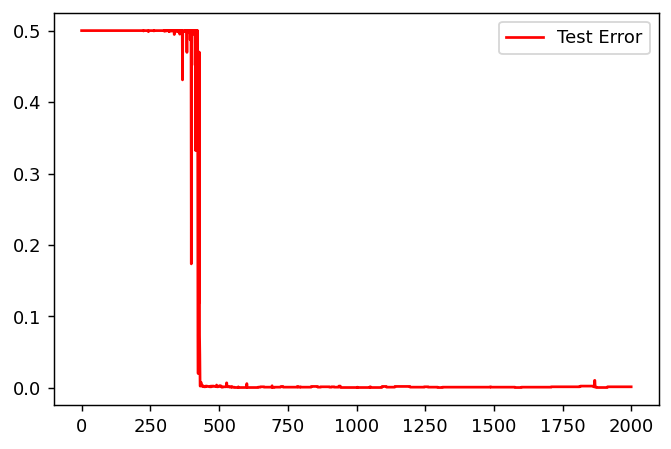

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0, dpi = 130)
plt.plot(range(2000), error_list_train, color="blue", label="Train Error")
plt.legend()
plt.figure(1, dpi = 130)
plt.plot(range(2000), error_list_test, color="red", label="Test Error")
plt.legend(loc='upper right')


## 2.Adagrad Method

In [ ]:
import matplotlib.pyplot as plt

def print_error(error_list_train, error_list_test, total_iteration):
  plt.figure(0, dpi = 130)
  plt.plot(range(total_iteration), error_list_train, color="blue", label="Train Error")
  plt.legend()
  plt.figure(1, dpi = 130)
  plt.plot(range(total_iteration), error_list_test, color="red", label="Test Error")
  plt.legend(loc='upper right')

def convert_matrix(x):
    '''convert matrix to 1D vector'''
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])      # for the training set
    x = np.reshape(x, (num_data, pixel_length * pixel_length, 1))       # reshape to (12000, 28*28, 1)(for Training Set)
    return x


def adagrad(x, y, m, n, weights=None, iterations=1000, lam=1, b=32, eta=0.1):
  '''
  input: x=training data(data_1), y=training labels(value_binary_1),m and n are test data and labels
  b is mini-batch size
  '''
  x = convert_matrix(x) # this function convert matrix to 1-D vector
  m = convert_matrix(m)
  error_list_1 = []
  error_list_2 = []
  if type(weights) == type(None): weights = np.zeros((len(x[0,:]),1)) 
  D = len(x[0,:]) # dimension D, which is a number
  array_s = np.ones(D)
  for i in range(iterations):
    gradient = np.zeros((len(x[0,:]),1))
    random = np.random.choice(x.shape[0],b,replace = False)
    for j in random:
      decision_1 = y[j] * np.dot(weights.T, x[j])[0,0]
      if decision_1 < 1:
        gradient += y[j] * x[j]
    #step = step * np.linalg.inv(G)
    gradient = lam * weights - gradient/b # same with Pegasos
    array_s = array_s + np.dot(gradient.T, gradient) + 1e-10
    # print(np.diag(np.sqrt(1/array_s)).shape) 
    weights = weights - eta * np.dot((np.diag(np.sqrt(1/array_s).flatten())),gradient)
    weights = min(1, lam**(-0.5)/(np.linalg.norm(weights))) * weights
    error_list_1.append(get_errors(x, y, weights)) # store error rate in each iteration in error_list
    error_list_2.append(get_errors(m, n, weights))
    if i % 10 == 0: 
        print(i/iterations)
  return error_list_1, error_list_2

def get_errors(x, y, weights):
    '''
    input: x=data_1(array), y=value_binary_1(array), weights is a matrix with row x and column y
    '''
    a = 0
    i = 0
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])
    for i in range(num_data):
#       if (np.dot(weights.T, x[i])[0, 0] < 0):
      decision = y[i] * (np.dot(weights.T, x[i])[0, 0])
      if decision < 1:
        a += 1
    error = a/len(x)
    return error

error_list_train_1, error_list_test_1 = (adagrad(data_1,value_binary_1, data_3, value_binary_2))
# print(error_list_train_1)
# print(error_list_test_1)
print_error(error_list_train_1, error_list_test_1, 1000)
  

In [ ]:
print(error_list_test_1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0, dpi = 130)
plt.plot(range(2000), error_list_train_1, color="blue", label="Train Error")
plt.legend()
plt.figure(1, dpi = 130)
plt.plot(range(2000), error_list_test_1, color="red", label="Test Error")
plt.legend(loc='upper right')


## 3. Categorize Multiple Class Based on Pegasos

In [ ]:
import matplotlib.pyplot as plt

def print_error(error_list_train, error_list_test, total_iteration):
  plt.figure(0, dpi = 130)
  plt.plot(range(total_iteration), error_list_train, color="blue", label="Train Error")
  plt.legend()
  plt.figure(1, dpi = 130)
  plt.plot(range(total_iteration), error_list_test, color="red", label="Test Error")
  plt.legend(loc='upper right')
  

0.0 %
5.0 %
10.0 %
15.0 %
20.0 %
25.0 %
30.0 %
35.0 %
40.0 %
45.0 %
50.0 %
55.00000000000001 %
60.0 %
65.0 %
70.0 %
75.0 %
80.0 %
85.0 %
90.0 %
95.0 %


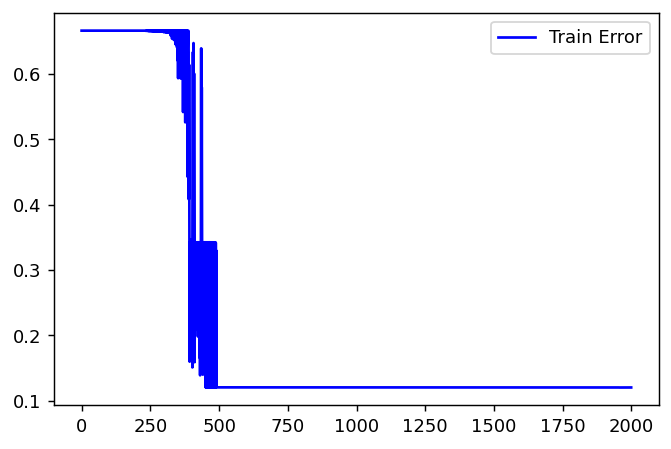

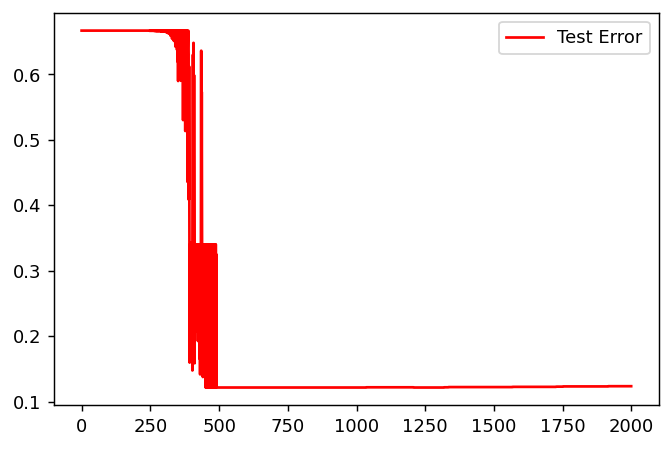

In [ ]:
from collections import Counter

def convert_matrix(x):
    '''convert matrix to 1D vector'''
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])      # for the training set
    x = np.reshape(x, (num_data, pixel_length * pixel_length, 1))       # reshape to (12000, 28*28, 1)(for Training Set)
    return x

def get_minibatch(batch_size, data_size): #  At=np.random.choice(len(X),self.b,replace=False)
    '''
    return a list of element inside a minibatch
    '''
    data_selected = []
    for i in range(batch_size):
      data_selected.append(random.randint(0, data_size-1))
    return data_selected


def multiclass_gradient(result, class_num, gradient, label, data):
    """
    This function could return the result of gradient corresponding to the rule:
    result: np.dot(weights[:, i].T, x[it])[0, 0] (which means the prediction of the current SVM)
    class[0]: +1: 2/ -1: 5; 
    class[1]: +1: 2/ -1: 7;
    class[2]: +1: 5/ -1: 7;
    """
    if (class_num == 0):
      # if label != 7 and prediction is wrong, change gradient, else: do nothing(don't change the gradient)
      if (label == 2 and result < 1):
        gradient[:, class_num:class_num+1] += data
      elif (label == 5 and result > 1):
        gradient[:, class_num:class_num+1] -= data

    elif (class_num == 1):
      # if label != 5 and prediction is wrong, change gradient, else: do nothing(don't change the gradient)
      if (label == 2 and result < 1):
        gradient[:, class_num:class_num+1] += data
      elif (label == 7 and result > 1):
        gradient[:, class_num:class_num+1] -= data

    elif (class_num == 2):
      # if label != 2 and prediction is wrong, change gradient, else: do nothing(don't change the gradient)
      if (label == 5 and result < 1):
        gradient[:, class_num:class_num+1] += data
      elif (label == 7 and result > 1):
        gradient[:, class_num:class_num+1] -= data
        
    return gradient


def pegasos_multiclass(x, y, m, n, num_class = 3, weights=None, iterations=2000, lam=1, b=64):
    '''
    input: x=data_1(array), y=value_binary_1(array), b is mini-batch size, m and n are test data(data_3) and test labels(value_binary_1(array))
    Chosen rule for multiclass: 
    class[0]: +1: 2/ -1: 5; 
    class[1]: +1: 2/ -1: 7;
    class[2]: +1: 5/ -1: 7;
    '''
    x = convert_matrix(x)
    m = convert_matrix(m)
    error_list_1 = []
    error_list_2 = []
    if type(weights) == type(None): weights = np.zeros((len(x[0]),num_class)) # weights: row x, column y (28*28, 3)
    num_S = len(y)
    mini_batch = get_minibatch(b, num_S)  # a list of index of the data
    for j in range(iterations):
      step = 1/(lam*(j+1))
      gradient = np.zeros((len(x[0]), num_class)) # shape: (28*28, 3) 
      for i in range(num_class):
#         it = random.randint(0, num_S-1)
        for it in range(len(mini_batch)):
          prediction =  np.dot(weights[:, i:i+1].T, x[it])[0, 0] 
          gradient = multiclass_gradient(prediction, i, gradient, y[it], x[it])  # Need to get the gradient following the rules
        value_1 = lam * weights[:, i:i+1] - gradient[:,i:i+1]/b # value_1: row x, column y
        weights_1 = weights[:, i:i+1] - step * value_1
        weights[:,i:i+1] = min(1, lam**(-0.5)/np.linalg.norm(weights_1)) * weights_1 # weights: row x, column y

      error_list_1.append(get_errors_multiclass(x, y, weights, num_class))
      error_list_2.append(get_errors_multiclass(m, n, weights, num_class))
      if j % 100 == 0:
        print(j/iterations*100, "%")
        # print("weights[20:25,:] ")
        # print(weights[20:25,:])
        # print(decision)
    return error_list_1, error_list_2, iterations

def decision_multiclass(prediction, class_num):
    """
    return the true decision using multiclass classification following the rules:
    class[0]: +1: 2/ -1: 5; 
    class[1]: +1: 2/ -1: 7;
    class[2]: +1: 5/ -1: 7;
    """
    if class_num == 0:
      result = 5 if prediction < 1 else 2
    elif class_num == 1:
      result = 7 if prediction < 1 else 2
    elif class_num == 2:
      result = 7 if prediction < 1 else 5
    return result


def get_errors_multiclass(x, y, weights, num_class):
    '''
    input: x=data_1(array), y=value_binary_1(array), weights is a matrix with row x and column y
    '''
    a = 0
#     i = 0
    pixel_length = len(x[0, 0, :])
    num_data = len(x[:, 0, 0])
    for i in range(num_data):
      decision = []
      for j in range(num_class):                    # collect the result of prediction for vote process
        prediction = (np.dot(weights[:, j:j+1].T, x[i])[0, 0])
        decision.append(decision_multiclass(prediction, j))
      vote = Counter(decision).most_common(1)[0][0]          # vote process: return the highest frequency element
      if vote != y[i]:
        a += 1
    error = a/num_data
    return error

error_list_train, error_list_test, total_iteration = (pegasos_multiclass(data_2, value_2, data_4, value_4))
print_error(error_list_train, error_list_test, total_iteration)

## 4. Categorize Multiple Class Based on CNN

In [ ]:
import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=(1,1))
        self.conv2 = nn.Conv2d(16, 256, kernel_size=3, padding=(1,1)) # output channel: 16 or 256?
        self.fc1 = nn.Linear(256*26*26, 64) #这里26用的是图片在conv2出来后的维度
        self.fc2 = nn.Linear(64, 3)

    def forward(self, x):
        tmp = self.conv1(x)
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=1, padding=0)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=1, padding=0)
        x = x.view(x.size(0), -1) #这里转置后，row就是batch的维度，后面的都是data的维度和channel的维度 回头查一下size(0)代表的数值
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def train(model, device, train_loader, optimizer, epoch, criterion): # 还可添加loss_func等参数
  model.train() # 必备，将模型设置为训练模式
  train_loss = 0
  for batch_idx, (data, target) in enumerate(train_loader): # 从数据加载器迭代一个batch的数据
      data, target = data.to(device), target.to(device) # 将数据存储CPU或者GPU
      optimizer.zero_grad() # 清除所有优化的梯度
      # print((data))
      output = model(data)  # 喂入数据并前向传播获取输出
      loss = criterion(output, target)
      # loss = F.nll_loss(output, target) # 调用损失函数计算损失
      loss.backward() # 反向传
      optimizer.step() # 更新参数
      train_loss += loss.item()
  train_loss /= len(train_loader.dataset)
  print("train_loss: ", train_loss)

def test(model, device, test_loader, criterion):
  model.eval() # 必备，将模型设置为评估模式
  test_loss = 0
  correct = 0
  print("Enter Test Case")
  with torch.no_grad(): # 禁用梯度计算
      for data, target in test_loader: # 从数据加载器迭代一个batch的数据
          data, target = data.to(device), target.to(device) 
          output = model(data)
          test_loss += criterion(output, target).item()
          # test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
          pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
          correct += pred.eq(target.view_as(pred)).sum().item() # 统计预测正确个数
  test_loss /= len(test_loader.dataset)
  print('Test Loss: ', test_loss)
  # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  #     test_loss, correct, len(test_loader.dataset),
  #     100. * correct / len(test_loader.dataset)))


def defineDataLoader(trainDataSet, trainDataLabel, testDataSet, testDataLabel):
  """
  return the dataloader based on dataset and it's label
  """
  trainset = MyTrainData(trainDataSet, trainDataLabel)
  testset =  MyTrainData(testDataSet, testDataLabel)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size = 10 )
  testloader = torch.utils.data.DataLoader(testset, batch_size = 10)
  return trainloader, testloader


class MyTrainData(torch.utils.data.Dataset):   #需要繼承data.Dataset
  def __init__(self, data, label, transform=None, train=True): #初始化文件路進或文件名
    self.train = train 
    self.data = data
    tmp = self.data.astype(np.float32)
    tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
    self.data = torch.from_numpy(tmp).float()
    self.data = self.data.unsqueeze(-3)
    self.label = torch.tensor(label).long() # Target is supposed to be long type

  def __getitem__(self, idx):
    if self.train:
      img = self.data[idx,:,:,:]
      gt = self.label[idx]
      return img, gt

  def __len__(self):
    return len(self.data[:,:,0,0])

def target_modif(target):
  for i in range(len(target)):
    if target[i] == 2:
      target[i] = 0
    elif target[i] == 5:
      target[i] = 1
    else:
      target[i] = 2
  return target

if __name__ == '__main__':
  # define some parameter here
  TotalIteration = 1000
  LearningRate = 0.01
  trainError = []
  testError  = []
  criterion = nn.CrossEntropyLoss()
  device = torch.device("cuda")

  # Make instance/object for all the component
  Netmodel = Net()
  Netmodel.to(device)
  value_2 = target_modif(value_2)
  value_4 = target_modif(value_4)
  trainloader, testloader = defineDataLoader(data_2, value_2, data_4, value_4) #need to input the data
  optimizer = optim.SGD(Netmodel.parameters(), lr=LearningRate)
  # device = torch.device("cpu")

  # Train and Test
  for i in range(TotalIteration):
    print(i)
    train(Netmodel, device, trainloader, optimizer, i, criterion)
    test(Netmodel, device, testloader, criterion)




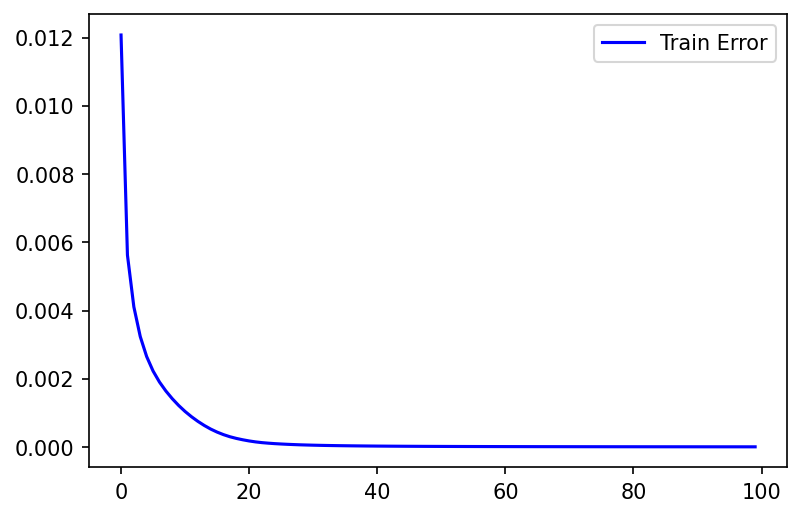

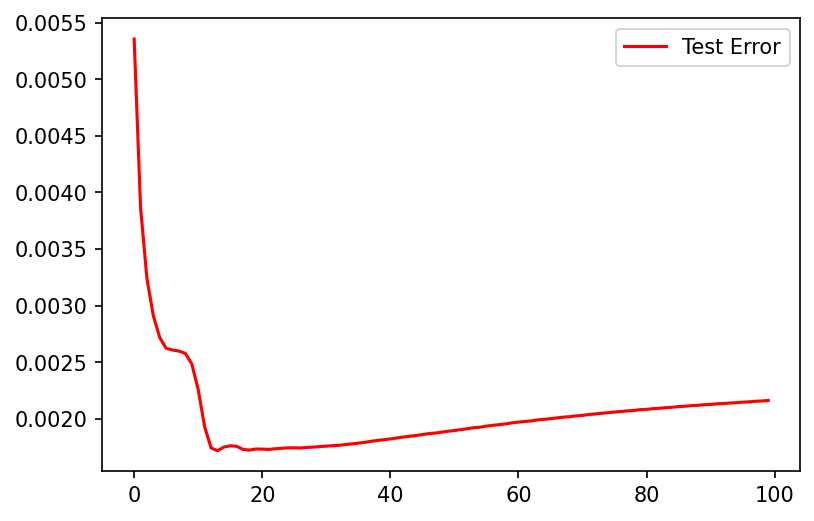

In [ ]:
import matplotlib.pyplot as plt

plt.figure(0, dpi = 150)
plt.plot(range(TotalIteration), trainError, color="blue", label="Train Error")
plt.legend()
# fig.savefig('Q6 - training error.png',dpi=300)
plt.figure(1, dpi = 150)
plt.plot(range(TotalIteration), testError, color="red", label="Test Error")
plt.legend(loc='upper right')